<h1 style="text-align: center;">Regularization</h1>
<h3 style="color: red;">We know</h3>
<h3 style="color: blue;"> cost function </h3>

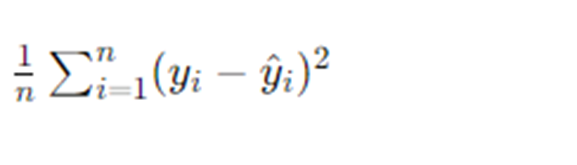


 <h5>where Yi is the exact value and Yi^ is the predicted value.</h5>
<p>Generally when we implement linear regression, the problem we often face is <b>overfitting</b>. <p style="font-size: 24px;color:red">Regularization</p>is used to mitigate the <b>overfitting</b> problem in linear regression.</p>
<h5>There are two types of Regularization:</h5>

<ul style="color: red">
    <li><b>Ridge (also called L2)</b></li>
    <li><b>Lasso (also called L1)</b></li>
</ul>
 
 in both L1 & L2 regularization there is add a ʎ value which make our model to mitigate overfit by adding a small value with the output result if the loss of the model is equal to zero.
 
 Ridge(L1) Regularization: In L1 the equation given below is added with the output value to always make it close to zero but not exactly. 
 
 
 
 
  where, 0 is the final loss or cost function which indicates overfitting,  ʎ value selected as parameter and the absolute slope value is mainly the value of m.
 
 
 Ridge(L2) Regularization: In L2 the equation given below is added with the output value to always make it close to zero but not exactly. 
 
 
 where,0 is the final loss or cost function which indicates overfitting, ʎ value selected as parameter and square of slope is mainly the value of m.
 
 
 
 

# Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mae, mean_absolute_error as mse, r2_score

In [2]:
df = pd.read_csv("/kaggle/input/house-pricing/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df =  df.dropna()

# DataSet Description

In [4]:
#crim: per capita crime rate by town
#zn: proportion of residential land zoned for lots over 25,000 sq.ft
#indus: proportion of non-retail business acres per town
#chas: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#nox:  nitric oxides concentration (parts per 10 million) parts/10M
#rm: average number of rooms per dwelling
#age:proportion of owner-occupied units built prior to 1940
#dis:weighted distances to five Boston employment centres
#rad: index of accessibility to radial highways
#tax:full-value property-tax rate per  10,000/10k
#ptratio:pupil-teacher ratio by town
#b:The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town¶
#istat:% lower status of the population
#medv:Median value of owner-occupied homes in 1000's dollars

In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA

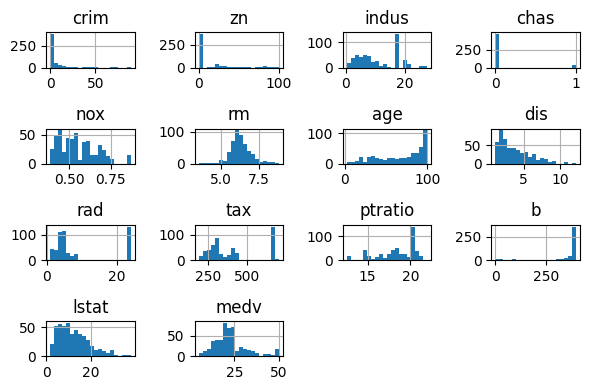

In [7]:
df.hist(bins=20, figsize=(6,4))
plt.tight_layout()
plt.show()

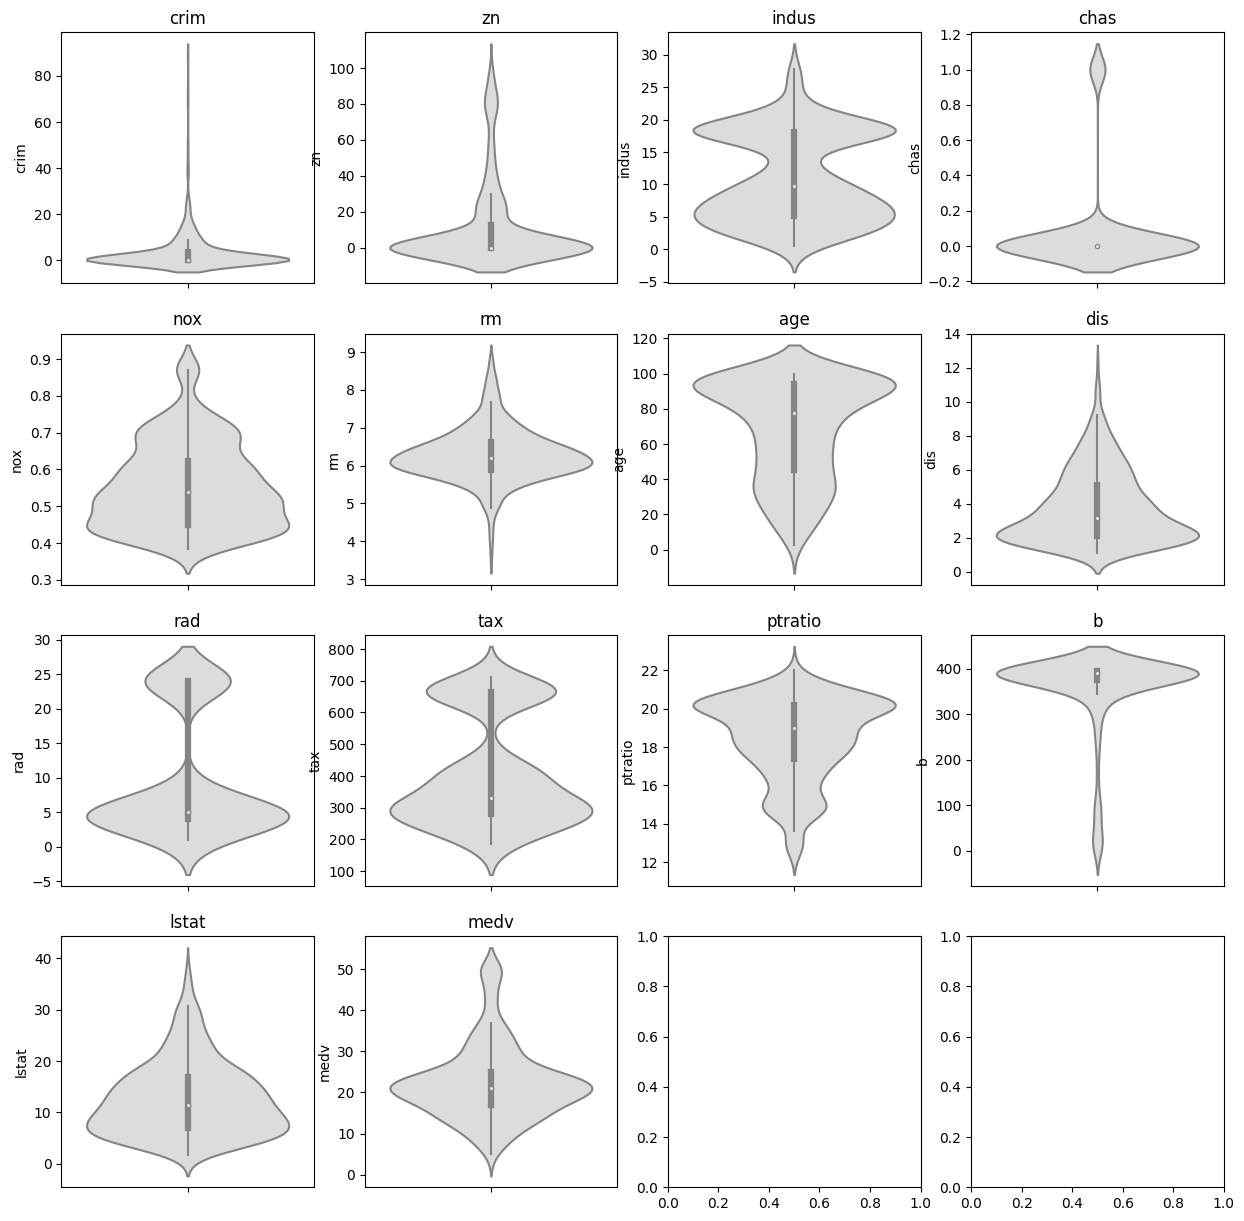

In [8]:
cols = df.columns  # Get all column names

# Calculate the number of rows and columns needed for subplots
num_cols = 4  # Number of columns in the grid
num_rows = -(-len(cols) // num_cols)  # Number of rows needed

# Create a grid for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
axes = axes.flatten()

# Plot each column as a violin plot
for i, col in enumerate(cols):
    sns.violinplot(data=df, y=col, ax=axes[i], palette='coolwarm')
    axes[i].set_title(col)

In [9]:
cols=df.columns

In [10]:
cols

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

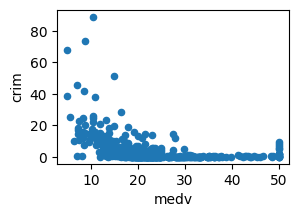

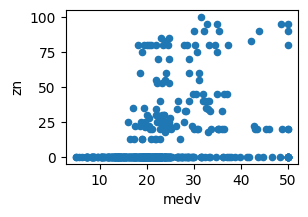

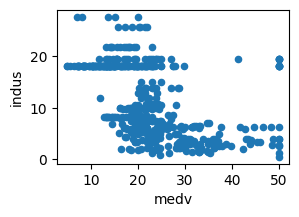

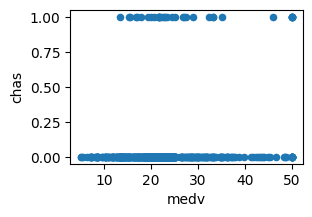

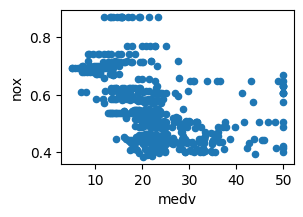

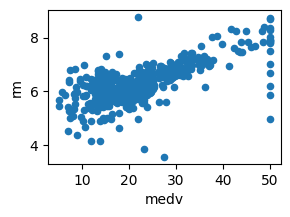

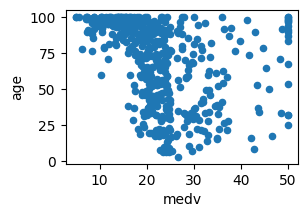

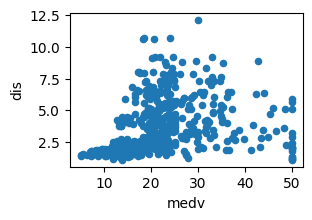

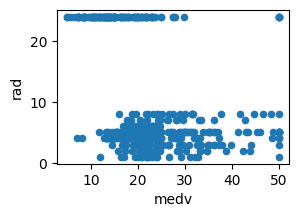

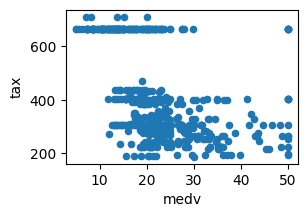

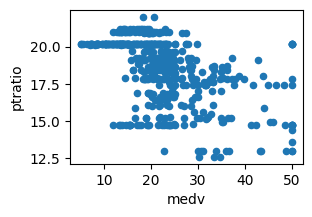

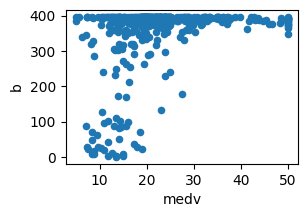

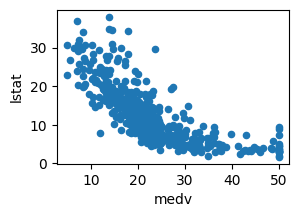

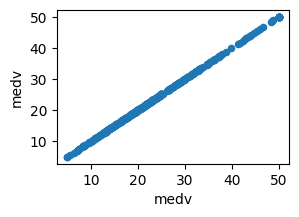

In [11]:
for i in range(len(cols)):
    df.plot(kind='scatter', x='medv', y=cols[i], figsize=(3,2))

In [12]:
df.shape

(501, 14)

In [13]:
cor = df.corr()

In [14]:
cor

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


# seperate dependent and independent variable 

In [15]:
x= df.drop("medv", axis=1)
y=df[["medv"]]

# apply normalization into independent variable 

In [16]:
st= StandardScaler()

In [17]:
new_x= st.fit_transform(x)

In [18]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# splitting the data set 

In [19]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=.20, random_state=2)

# apply simple linear Regression into the data 

In [20]:
li= LinearRegression()

# fit model on train data (train model)

In [21]:
li.fit(xtrain,ytrain)

LinearRegression()

# result score in train data 

In [22]:
li.score(xtrain,ytrain)

0.7322345681367519

# Test result

In [23]:
li.score(xtest,ytest)

0.7687725815059971

# findout different types of error

In [24]:
pred= li.predict(xtest) # find the results of yprediction

# find out mean absoluate error

In [25]:
mae_score= mae(ytest,pred)

In [26]:
mae_score

17.725394771492915

# find out mean squared error

In [27]:
mse_score= mse(ytest,pred)

In [28]:
mse_score

2.9158467093438034

# find out r^2 score as performance measure

In [29]:
r2_score_= r2_score(ytest,pred)

In [30]:
r2_score_

0.7687725815059971

# find out the data distribution for the prediction result

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Density'>

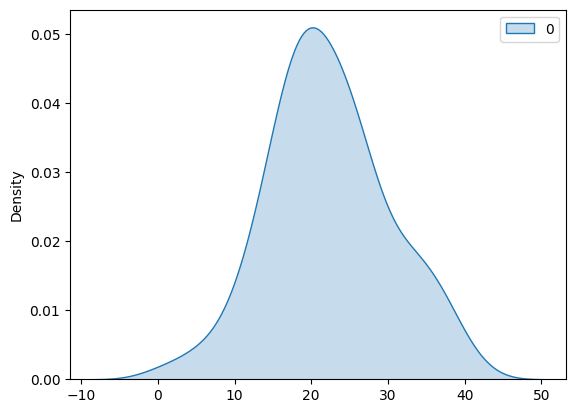

In [31]:
sns.kdeplot(pred, fill=True)

# apply ridge and Lasso regression

# Ridge Regression

In [32]:
ridge= Ridge()

In [33]:
ridge

Ridge()

# finding the best parameters for the ridge refression through grid search tecnique and train the model

In [34]:
parameters = {'alpha': np.logspace(-1,10,1000)}
ridgecv = GridSearchCV(ridge, parameters, scoring='neg_mean_absolute_error', cv=8)
ridgecv.fit(xtrain, ytrain)

GridSearchCV(cv=8, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-01, 1.02567793e-01, 1.05201522e-01, 1.07902879e-01,
       1.10673602e-01, 1.13515471e-01, 1.16430313e-01, 1.19420003e-01,
       1.22486461e-01, 1.25631660e-01, 1.28857621e-01, 1.32166418e-01,
       1.35560179e-01, 1.39041083e-01, 1.42611371e-01, 1.46273336e-01,
       1.50029332e-01, 1.53881775e-01, 1.57833141e-01, 1....
       5.58144625e+09, 5.72476624e+09, 5.87176639e+09, 6.02254120e+09,
       6.17718760e+09, 6.33580499e+09, 6.49849535e+09, 6.66536327e+09,
       6.83651600e+09, 7.01206359e+09, 7.19211887e+09, 7.37679760e+09,
       7.56621850e+09, 7.76050334e+09, 7.95977700e+09, 8.16416760e+09,
       8.37380654e+09, 8.58882856e+09, 8.80937190e+09, 9.03557835e+09,
       9.26759330e+09, 9.50556592e+09, 9.74964918e+09, 1.00000000e+10])},
             scoring='neg_mean_absolute_error')

# shows the best parameter for the alpha value 

In [35]:
best_pram = ridgecv.best_params_
best_pram

{'alpha': 0.5607234882852032}

In [36]:
best_score=ridgecv.best_score_

In [37]:
best_score

-3.5693963539448577

# get the new assumptions as predict result from test data

In [38]:
ridge_score=ridgecv.predict(xtest)

In [39]:
score= r2_score(ytest,ridge_score)

In [40]:
score

0.762242917081035

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Density'>

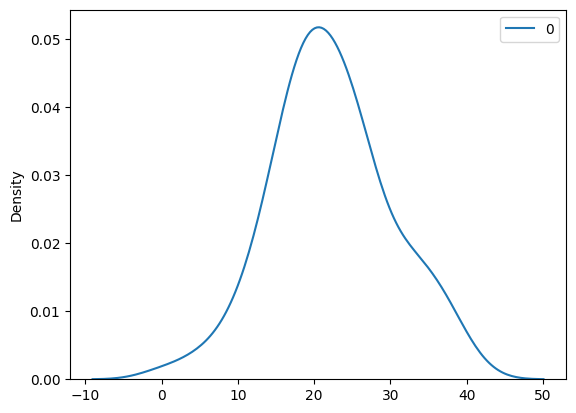

In [41]:
sns.kdeplot(ridge_score)

In [42]:
best_model = ridgecv.best_estimator_

In [43]:
best_model

Ridge(alpha=0.5607234882852032)

In [44]:
# predictions for ridge
ypred_ridge = best_model.predict(xtest)

# Evaluation
mse_ridge = mse(ytest, ypred_ridge)
r2_ridge = r2_score(ytest, ypred_ridge)

print(f'MSE for Ridge: {mse_ridge} and R2: {r2_ridge}')

MSE for Ridge: 2.9360977917603126 and R2: 0.762242917081035


# Lasso Regression implementation

In [45]:
lasso= Lasso()

In [46]:
lasso

Lasso()

In [47]:
parameters = {'alpha': np.logspace(-.1,10,1000)}
lassocv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=8)
lassocv.fit(xtrain, ytrain)

GridSearchCV(cv=8, estimator=Lasso(),
             param_grid={'alpha': array([7.94328235e-01, 8.13036626e-01, 8.32185645e-01, 8.51785672e-01,
       8.71847327e-01, 8.92381484e-01, 9.13399271e-01, 9.34912079e-01,
       9.56931566e-01, 9.79469667e-01, 1.00253860e+00, 1.02615085e+00,
       1.05031924e+00, 1.07505685e+00, 1.10037709e+00, 1.12629369e+00,
       1.15282069e+00, 1.17997246e+00, 1.20776373e+00, 1....
       5.85419882e+09, 5.99207965e+09, 6.13320792e+09, 6.27766011e+09,
       6.42551450e+09, 6.57685123e+09, 6.73175231e+09, 6.89030170e+09,
       7.05258531e+09, 7.21869111e+09, 7.38870910e+09, 7.56273144e+09,
       7.74085244e+09, 7.92316862e+09, 8.10977881e+09, 8.30078412e+09,
       8.49628808e+09, 8.69639664e+09, 8.90121825e+09, 9.11086391e+09,
       9.32544725e+09, 9.54508455e+09, 9.76989486e+09, 1.00000000e+10])},
             scoring='neg_mean_squared_error')

In [48]:
best_pram_lasso= lassocv.best_params_
best_scorelasso= lassocv.best_score_

In [49]:
best_pram_lasso

{'alpha': 0.7943282347242815}

In [50]:
best_scorelasso

-29.21759759390821

In [51]:
lasso_score=lassocv.predict(xtest)

In [52]:
score= r2_score(ytest,lasso_score)

In [53]:
score

0.7100884358923447

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

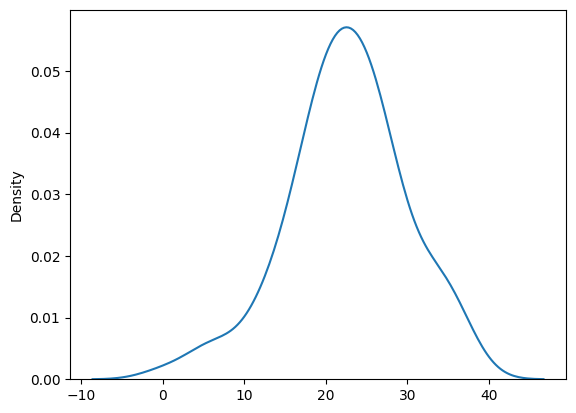

In [54]:
sns.kdeplot(lasso_score)

In [55]:
best_model = lassocv.best_estimator_

In [56]:
best_model

Lasso(alpha=0.7943282347242815)

In [57]:
ypred_lasso = best_model.predict(xtest)

# Evaluation
mse_lasso = mse(ytest, ypred_lasso)
r2_lasso = r2_score(ytest, ypred_lasso)

print(f'MSE for Ridge: {mse_lasso} and R2: {r2_lasso}')

MSE for Ridge: 3.384760243952657 and R2: 0.7100884358923447
